<a href="https://colab.research.google.com/github/jocobtt/Python-projects/blob/master/bakery_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try a kaggle competition

In [0]:
#kaggle comp start
#need to know full path name to get zip file from online
#make directory again before running below script
!mkdir trans

mkdir: cannot create directory ‘trans’: File exists


In [0]:
!ls

sample_data  trans


In [0]:
import os
os.chdir('/content/trans')

In [0]:
!ls

BreadBasket_DMS.csv  transactions-from-a-bakery.zip


In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!unzip transactions-from-a-bakery.zip

Archive:  transactions-from-a-bakery.zip
replace BreadBasket_DMS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import pandas as pd
import seaborn as sns
import sklearn 
import statsmodels.formula.api as smf
import numpy as np

In [0]:
df = pd.read_csv('BreadBasket_DMS.csv',sep=',',encoding='utf8')

In [0]:
df.head()


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [0]:
df['datetime'] = df['Date'] + ' '+ df['Time']

In [0]:
#dataframe of just dates and number of transactions
trans = pd.DataFrame({'count': df.groupby(['datetime']).size()}).reset_index()
trans.head()

,datetime,count
0,2016-10-30 09:58:11,1
1,2016-10-30 10:05:34,2
2,2016-10-30 10:07:57,3
3,2016-10-30 10:08:41,1
4,2016-10-30 10:13:03,3


In [0]:
df['datetime'] = pd.to_datetime(df.datetime)
df['datetime'].head()

0   2016-10-30 09:58:11
1   2016-10-30 10:05:34
2   2016-10-30 10:05:34
3   2016-10-30 10:07:57
4   2016-10-30 10:07:57
Name: datetime, dtype: datetime64[ns]

In [0]:
#make y into count and date into ds and drop date and count columns for time series
trans['ds'] = trans['datetime']
trans['y'] = trans['count']
trans = trans.drop(['datetime','count'],axis=1)


In [0]:
trans.head()

,ds,y
0,2016-10-30 09:58:11,1
1,2016-10-30 10:05:34,2
2,2016-10-30 10:07:57,3
3,2016-10-30 10:08:41,1
4,2016-10-30 10:13:03,3


In [0]:
#split into each month, year, and day ind columns
df['year'] = df['Date'].apply(lambda x: x.split('-')[0])

df['month'] = df['Date'].apply(lambda x: x.split('-')[1])

df['day'] = df['Date'].apply(lambda x: x.split('-')[2])

In [0]:
df.head()

,Date,Time,Transaction,Item,datetime,year,month,day
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,2016,10,30
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,2016,10,30
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,2016,10,30
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,2016,10,30
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,2016,10,30


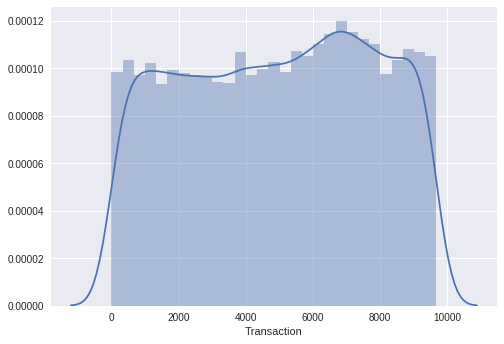

In [0]:
sns.distplot(df.Transaction)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [0]:
items_unique_list = df['Item'].unique()

In [0]:
word_list = ["NaN", "-", "nan", "NAN", "None", "NONE", "none", " ", "_", "."]

found_words = [word_list[i] for i, c in enumerate([w in items_unique_list for w in word_list]) if c == True]
found_words

['NONE']

In [0]:
len(df[df['Item'] == 'NONE'])

786

In [0]:
#drop NA values 
for i in found_words:
  df = df.replace(to_replace=i,value=np.nan).dropna()

In [0]:
print(len(df[df['Item'] == 'NONE']))
print(len(df.Item.unique()))

0
94


In [0]:
#get value counts for items 
top_15 = df.Item.value_counts()[:15]

In [0]:
Other =  df.Item.count()-top_15.sum()
Other

3675

In [0]:
list_of_items = top_15.append(pd.Series([Other],index=['Other']))
list_of_items

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Other            3675
dtype: int64

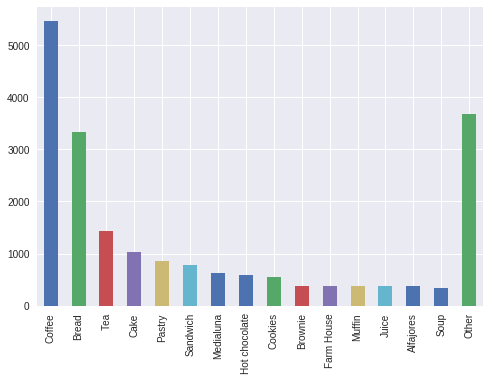

In [0]:
#graph this w/ a histogram
list_of_items.plot(kind='bar')

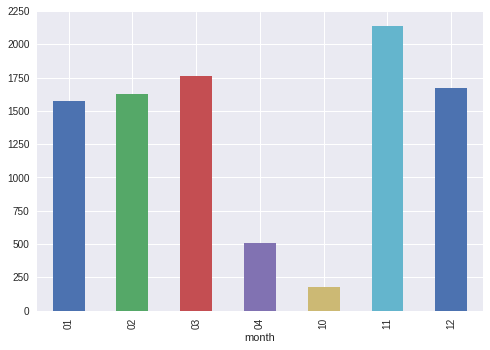

In [0]:
df.groupby(df.month)['Transaction'].nunique().plot(kind='bar')

##Time Series

In [0]:
!pip install fbprophet

    100% |████████████████████████████████| 2.1MB 11.6MB/s 
    100% |████████████████████████████████| 50.0MB 971kB/s 
  Running setup.py bdist_wheel for fbprophet ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-ag_y6bek/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-ug2ftupm --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-ag_y6bek/fbprophet/setup.py", line 123, in <module>
      """
    File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 140, in setup
      return distutils.core.setup(**attrs)
    File "/usr/lib/pytho

In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(trans)

In [0]:
future = m.make_future_dataframe(periods=150)
future.tail()

,ds
9891,2018-04-05 15:04:24
9892,2018-04-06 15:04:24
9893,2018-04-07 15:04:24
9894,2018-04-08 15:04:24
9895,2018-04-09 15:04:24


In [0]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9891,2018-04-05 15:04:24,2.815016,1.173931,4.390307
9892,2018-04-06 15:04:24,2.806660,1.069177,4.406283
9893,2018-04-07 15:04:24,2.983341,1.281382,4.733370
9894,2018-04-08 15:04:24,3.083951,1.395437,4.719745
9895,2018-04-09 15:04:24,2.640216,1.020468,4.303709


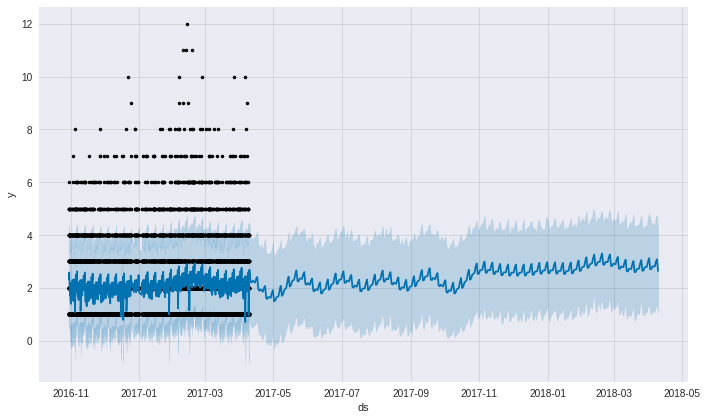

In [0]:
figg = m.plot(forecast)

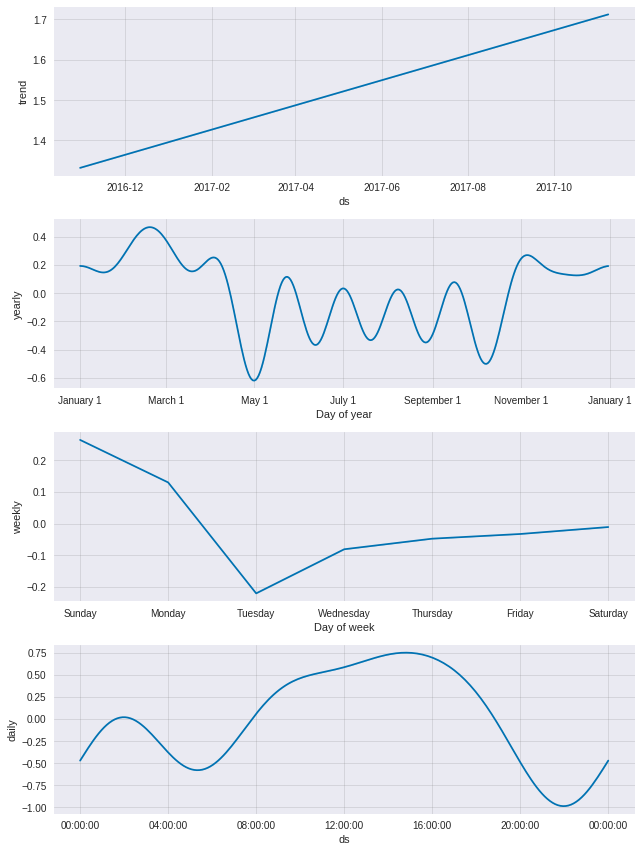

In [0]:
fig2 = m.plot_components(forecast)

In [0]:
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:1682, 'yhat']-trans['y'])**2)) )

RMSE: 1.186582


In [0]:
m = Prophet(changepoint_prior_scale=2.5)
m.add_seasonality(name='monthly',periods=30.5,fourier_order=5)
m.fit(trans)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

##Association Mining

In [0]:
#!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [0]:
#count num of unique items
len(df.Item.unique())

95

In [0]:
df.Item.value_counts()[:15]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Name: Item, dtype: int64

In [0]:
trans_list = []
#create a list of unique transactions- needs to be a list to feed through algo
for i in df['Transaction'].unique():
  llist = list(set(df[df['Transaction']==i]['Item']))
  if len(llist)>0:
    trans_list.append(llist)
print(len(trans_list))

9465


In [0]:
TransactionEncoder()

TransactionEncoder()

In [0]:
tran_enc = TransactionEncoder()
tran_array = tran_enc.fit(trans_list).transform(trans_list)
tranz_df = pd.DataFrame(tran_array,columns=tran_enc.columns_)

In [0]:
freq_items = apriori(tranz_df,min_support=0.01,use_colnames=True)
rules = association_rules(freq_items,metric='lift',min_threshold=1)
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [0]:
#higher the lift value the stronger the correlation between the items is